In [1]:
# Pandas library for the pandas dataframes
import pandas as pd
from pandas import DataFrame
import numpy as np
import scipy.stats as stats
import scipy



# Import Scikit-Learn library for decision tree models
import sklearn         
from sklearn import linear_model, datasets
from sklearn.utils import resample
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor, BaggingClassifier, RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_validate, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn import metrics
from sklearn.utils import resample
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

# Modles
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

# Error
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#One Hot Encoding & Column Transform
from sklearn.svm import SVR
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from matplotlib import pyplot as plt

from tqdm import tqdm

import os
import joblib

In [2]:
df = pd.read_csv('../dataset/hao/abs_only.csv')
df

,in_source,in_amount_mmol,p_source,p_amount_mmol,sol,sol_amount_ml,TOP,TOP_amount_mmol,acid,acid_amount_mmol,...,thiol,thiol_amount_mmol,zinc,zinc_amount_mmol,other,other_amount_mmol,total_volume_ml,temp_c,time_min,abs_nm
0,indium myristate,0.10,tris(trimethylsilyl)phosphine,0.10,octadecene,8.0,None,0.000000,None,0.0,...,dodecanethiol,0.05,zinc stearate,0.1,None,0.000000,8.012,300,30.0,436
1,indium chloride,10.00,sodium phosphide,10.00,4-ethylpyridine,50.0,trioctylphosphine,44.841900,None,0.0,...,None,0.00,None,0.0,None,0.000000,70.000,130,2880.0,587
2,indium chloride,10.00,sodium phosphide,11.30,dimethylformamide,90.0,None,0.000000,None,0.0,...,None,0.00,None,0.0,None,0.000000,90.000,160,120.0,465
3,"indium tris(N,N-diisopropylacetamidinato)",0.90,tris(trimethylsilyl)phosphine,0.15,mesitylene,5.0,None,0.000000,palmitic acid,0.3,...,None,0.00,None,0.0,None,0.000000,5.077,150,1260.0,523
4,"indium tris(N,N-diisopropylacetamidinato)",0.90,tris(trimethylsilyl)phosphine,0.15,mesitylene,5.0,None,0.000000,palmitic acid,0.3,...,None,0.00,None,0.0,None,0.000000,5.077,230,1260.0,584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,indium oxalate,2.33,tris(trimethylsilyl)phosphine,3.00,None,0.0,trioctylphosphine,24.552424,None,0.0,...,None,0.00,None,0.0,trioctylphosphine oxide,1.011111,11.962,300,4320.0,729
228,chloroindium oxalate,4.20,tris(trimethylsilyl)phosphine,2.07,None,0.0,trioctylphosphine,13.452570,None,0.0,...,None,0.00,None,0.0,trioctylphosphine oxide,11.111111,17.112,280,4320.0,599
229,indium chloride,2.26,tris(trimethylsilyl)phosphine,2.00,None,0.0,trioctylphosphine,17.936760,None,0.0,...,None,0.00,None,0.0,trioctylphosphine oxide,0.830000,8.830,270,1140.0,633
230,indium chloride,0.10,tris(trimethylsilyl)phosphine,0.10,None,0.0,trioctylphosphine,11.210475,None,0.0,...,None,0.00,zinc oleate,2.0,None,0.000000,5.000,280,60.0,423


In [6]:
#Checks if there are any columns with no values
df.isna().sum()

in_source            0
in_amount_mmol       0
p_source             0
p_amount_mmol        0
sol                  0
sol_amount_ml        0
TOP                  0
TOP_amount_mmol      0
acid                 0
acid_amount_mmol     0
amine                0
amine_amount_mmol    0
thiol                0
thiol_amount_mmol    0
zinc                 0
zinc_amount_mmol     0
other                0
other_amount_mmol    0
total_volume_ml      0
temp_c               0
time_min             0
abs_nm               0
dtype: int64

In [8]:
#Separate out initial DataFrame into the input features and output features

df_input = df.drop(columns =['abs_nm'], inplace = False, axis = 1) 
df_output = df['abs_nm'].to_frame()


In [9]:
df_input.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   in_source          232 non-null    object 
 1   in_amount_mmol     232 non-null    float64
 2   p_source           232 non-null    object 
 3   p_amount_mmol      232 non-null    float64
 4   sol                232 non-null    object 
 5   sol_amount_ml      232 non-null    float64
 6   TOP                232 non-null    object 
 7   TOP_amount_mmol    232 non-null    float64
 8   acid               232 non-null    object 
 9   acid_amount_mmol   232 non-null    float64
 10  amine              232 non-null    object 
 11  amine_amount_mmol  232 non-null    float64
 12  thiol              232 non-null    object 
 13  thiol_amount_mmol  232 non-null    float64
 14  zinc               232 non-null    object 
 15  zinc_amount_mmol   232 non-null    float64
 16  other              232 non

In [10]:
#Converts the values in the "temp_c" column into float types
df_input['temp_c'] = df_input['temp_c'].astype(float)

df_input.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   in_source          232 non-null    object 
 1   in_amount_mmol     232 non-null    float64
 2   p_source           232 non-null    object 
 3   p_amount_mmol      232 non-null    float64
 4   sol                232 non-null    object 
 5   sol_amount_ml      232 non-null    float64
 6   TOP                232 non-null    object 
 7   TOP_amount_mmol    232 non-null    float64
 8   acid               232 non-null    object 
 9   acid_amount_mmol   232 non-null    float64
 10  amine              232 non-null    object 
 11  amine_amount_mmol  232 non-null    float64
 12  thiol              232 non-null    object 
 13  thiol_amount_mmol  232 non-null    float64
 14  zinc               232 non-null    object 
 15  zinc_amount_mmol   232 non-null    float64
 16  other              232 non

In [11]:
df_output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   abs_nm  232 non-null    int64
dtypes: int64(1)
memory usage: 1.9 KB


In [12]:
#Initializes 2 lists to contain all of the numerical and categorical input columns
input_num_cols = [col for col in df_input.columns if df[col].dtypes !='O']
input_cat_cols = [col for col in df_input.columns if df[col].dtypes =='O']
input_cat_cols

['in_source',
 'p_source',
 'sol',
 'TOP',
 'acid',
 'amine',
 'thiol',
 'zinc',
 'other']

In [14]:
#Initializes the ColumnTransformer object, and specifies what it will do with a passed in dataframe
ct = ColumnTransformer([
    ('step1', StandardScaler(), input_num_cols),
    ('step2', OneHotEncoder(sparse=False, handle_unknown='ignore'), input_cat_cols)
], remainder = 'passthrough')

In [15]:
#Uses the ColumnTransformer object to modify the input columns
df_input_scaled_encoded = pd.DataFrame(ct.fit_transform(df_input))
df_input_scaled_encoded

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
0,-0.568164,-0.599879,-0.220331,-0.290658,-0.426982,-0.59381,1.447477,-0.458490,-0.262574,-0.342594,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7.798304,6.696720,2.089134,7.442189,-0.426982,-0.59381,-0.072046,-0.540477,-0.262574,3.068750,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.798304,7.654859,4.288624,-0.290658,-0.426982,-0.59381,-0.072046,-0.540477,-0.262574,4.169397,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.107914,-0.563028,-0.385292,-0.290658,-0.312277,-0.55068,-0.072046,-0.540477,-0.262574,-0.504114,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.107914,-0.563028,-0.385292,-0.290658,-0.312277,-0.55068,-0.072046,-0.540477,-0.262574,-0.504114,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,1.316404,1.537509,-0.660229,3.943332,-0.426982,-0.59381,-0.072046,-0.540477,0.620734,-0.125216,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
228,2.896737,0.852070,-0.660229,2.029196,-0.426982,-0.59381,-0.072046,-0.540477,9.444101,0.158200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
229,1.257247,0.800478,-0.660229,2.802481,-0.426982,-0.59381,-0.072046,-0.540477,0.462515,-0.297577,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
230,-0.568164,-0.599879,-0.660229,1.642553,-0.426982,-0.59381,-0.072046,1.099259,-0.262574,-0.508351,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
#Now that we have transformed all of the relevant columns, how can we take back all of the relevant column names

ct.transformers_

[('step1',
  StandardScaler(),
  ['in_amount_mmol',
   'p_amount_mmol',
   'sol_amount_ml',
   'TOP_amount_mmol',
   'acid_amount_mmol',
   'amine_amount_mmol',
   'thiol_amount_mmol',
   'zinc_amount_mmol',
   'other_amount_mmol',
   'total_volume_ml',
   'temp_c',
   'time_min']),
 ('step2',
  OneHotEncoder(handle_unknown='ignore', sparse=False),
  ['in_source',
   'p_source',
   'sol',
   'TOP',
   'acid',
   'amine',
   'thiol',
   'zinc',
   'other'])]

In [17]:
#Look into ct object to see the column titles
array_of_cat_titles = ct.transformers_[1][1].get_feature_names()
len(array_of_cat_titles)

61

In [18]:
#Number of numerical columns in the dataset
len(input_num_cols)

12

In [19]:
for i in range(len(input_num_cols)):
    df_input_scaled_encoded.rename(columns={df_input_scaled_encoded.columns[i]: input_num_cols[i]}, inplace = True)

for j in range(len(array_of_cat_titles)):
    df_input_scaled_encoded.rename(columns={df_input_scaled_encoded.columns[i+1]: array_of_cat_titles[j]}, inplace = True)
    i = i + 1

In [20]:
df_input_scaled_encoded

,in_amount_mmol,p_amount_mmol,sol_amount_ml,TOP_amount_mmol,acid_amount_mmol,amine_amount_mmol,thiol_amount_mmol,zinc_amount_mmol,other_amount_mmol,total_volume_ml,...,x8_None,x8_acetic acid,x8_copper bromide,x8_dioctyl ether,x8_oleic acid,x8_tetrabutylammonium myristate,x8_trioctylamine,x8_trioctylphosphine oxide,x8_water,x8_zinc iodide
0,-0.568164,-0.599879,-0.220331,-0.290658,-0.426982,-0.59381,1.447477,-0.458490,-0.262574,-0.342594,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7.798304,6.696720,2.089134,7.442189,-0.426982,-0.59381,-0.072046,-0.540477,-0.262574,3.068750,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.798304,7.654859,4.288624,-0.290658,-0.426982,-0.59381,-0.072046,-0.540477,-0.262574,4.169397,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.107914,-0.563028,-0.385292,-0.290658,-0.312277,-0.55068,-0.072046,-0.540477,-0.262574,-0.504114,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.107914,-0.563028,-0.385292,-0.290658,-0.312277,-0.55068,-0.072046,-0.540477,-0.262574,-0.504114,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,1.316404,1.537509,-0.660229,3.943332,-0.426982,-0.59381,-0.072046,-0.540477,0.620734,-0.125216,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
228,2.896737,0.852070,-0.660229,2.029196,-0.426982,-0.59381,-0.072046,-0.540477,9.444101,0.158200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
229,1.257247,0.800478,-0.660229,2.802481,-0.426982,-0.59381,-0.072046,-0.540477,0.462515,-0.297577,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
230,-0.568164,-0.599879,-0.660229,1.642553,-0.426982,-0.59381,-0.072046,1.099259,-0.262574,-0.508351,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
df_scaled_encoded = pd.concat([df_input_scaled_encoded, df_output], axis = 1)
df_scaled_encoded

,in_amount_mmol,p_amount_mmol,sol_amount_ml,TOP_amount_mmol,acid_amount_mmol,amine_amount_mmol,thiol_amount_mmol,zinc_amount_mmol,other_amount_mmol,total_volume_ml,...,x8_acetic acid,x8_copper bromide,x8_dioctyl ether,x8_oleic acid,x8_tetrabutylammonium myristate,x8_trioctylamine,x8_trioctylphosphine oxide,x8_water,x8_zinc iodide,abs_nm
0,-0.568164,-0.599879,-0.220331,-0.290658,-0.426982,-0.59381,1.447477,-0.458490,-0.262574,-0.342594,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,436
1,7.798304,6.696720,2.089134,7.442189,-0.426982,-0.59381,-0.072046,-0.540477,-0.262574,3.068750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,587
2,7.798304,7.654859,4.288624,-0.290658,-0.426982,-0.59381,-0.072046,-0.540477,-0.262574,4.169397,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,465
3,0.107914,-0.563028,-0.385292,-0.290658,-0.312277,-0.55068,-0.072046,-0.540477,-0.262574,-0.504114,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,523
4,0.107914,-0.563028,-0.385292,-0.290658,-0.312277,-0.55068,-0.072046,-0.540477,-0.262574,-0.504114,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,1.316404,1.537509,-0.660229,3.943332,-0.426982,-0.59381,-0.072046,-0.540477,0.620734,-0.125216,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,729
228,2.896737,0.852070,-0.660229,2.029196,-0.426982,-0.59381,-0.072046,-0.540477,9.444101,0.158200,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,599
229,1.257247,0.800478,-0.660229,2.802481,-0.426982,-0.59381,-0.072046,-0.540477,0.462515,-0.297577,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,633
230,-0.568164,-0.599879,-0.660229,1.642553,-0.426982,-0.59381,-0.072046,1.099259,-0.262574,-0.508351,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,423


In [22]:
df_scaled_encoded.to_csv('InP_hao_absorbance_only_scaled.csv')

In [23]:
df_scaled_encoded

,in_amount_mmol,p_amount_mmol,sol_amount_ml,TOP_amount_mmol,acid_amount_mmol,amine_amount_mmol,thiol_amount_mmol,zinc_amount_mmol,other_amount_mmol,total_volume_ml,...,x8_acetic acid,x8_copper bromide,x8_dioctyl ether,x8_oleic acid,x8_tetrabutylammonium myristate,x8_trioctylamine,x8_trioctylphosphine oxide,x8_water,x8_zinc iodide,abs_nm
0,-0.568164,-0.599879,-0.220331,-0.290658,-0.426982,-0.59381,1.447477,-0.458490,-0.262574,-0.342594,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,436
1,7.798304,6.696720,2.089134,7.442189,-0.426982,-0.59381,-0.072046,-0.540477,-0.262574,3.068750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,587
2,7.798304,7.654859,4.288624,-0.290658,-0.426982,-0.59381,-0.072046,-0.540477,-0.262574,4.169397,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,465
3,0.107914,-0.563028,-0.385292,-0.290658,-0.312277,-0.55068,-0.072046,-0.540477,-0.262574,-0.504114,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,523
4,0.107914,-0.563028,-0.385292,-0.290658,-0.312277,-0.55068,-0.072046,-0.540477,-0.262574,-0.504114,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,1.316404,1.537509,-0.660229,3.943332,-0.426982,-0.59381,-0.072046,-0.540477,0.620734,-0.125216,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,729
228,2.896737,0.852070,-0.660229,2.029196,-0.426982,-0.59381,-0.072046,-0.540477,9.444101,0.158200,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,599
229,1.257247,0.800478,-0.660229,2.802481,-0.426982,-0.59381,-0.072046,-0.540477,0.462515,-0.297577,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,633
230,-0.568164,-0.599879,-0.660229,1.642553,-0.426982,-0.59381,-0.072046,1.099259,-0.262574,-0.508351,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,423


In [3]:
df_abs = pd.read_csv("InP_hao_absorbance_only_scaled.csv")
df_abs

,Unnamed: 0,in_amount_mmol,p_amount_mmol,sol_amount_ml,TOP_amount_mmol,acid_amount_mmol,amine_amount_mmol,thiol_amount_mmol,zinc_amount_mmol,other_amount_mmol,...,x8_acetic acid,x8_copper bromide,x8_dioctyl ether,x8_oleic acid,x8_tetrabutylammonium myristate,x8_trioctylamine,x8_trioctylphosphine oxide,x8_water,x8_zinc iodide,abs_nm
0,0,-0.568164,-0.599879,-0.220331,-0.290658,-0.426982,-0.59381,1.447477,-0.458490,-0.262574,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,436
1,1,7.798304,6.696720,2.089134,7.442189,-0.426982,-0.59381,-0.072046,-0.540477,-0.262574,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,587
2,2,7.798304,7.654859,4.288624,-0.290658,-0.426982,-0.59381,-0.072046,-0.540477,-0.262574,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,465
3,3,0.107914,-0.563028,-0.385292,-0.290658,-0.312277,-0.55068,-0.072046,-0.540477,-0.262574,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,523
4,4,0.107914,-0.563028,-0.385292,-0.290658,-0.312277,-0.55068,-0.072046,-0.540477,-0.262574,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,227,1.316404,1.537509,-0.660229,3.943332,-0.426982,-0.59381,-0.072046,-0.540477,0.620734,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,729
228,228,2.896737,0.852070,-0.660229,2.029196,-0.426982,-0.59381,-0.072046,-0.540477,9.444101,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,599
229,229,1.257247,0.800478,-0.660229,2.802481,-0.426982,-0.59381,-0.072046,-0.540477,0.462515,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,633
230,230,-0.568164,-0.599879,-0.660229,1.642553,-0.426982,-0.59381,-0.072046,1.099259,-0.262574,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,423


In [7]:
df_abs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    232 non-null    int64  
 1   in_amount_mmol                                232 non-null    float64
 2   p_amount_mmol                                 232 non-null    float64
 3   sol_amount_ml                                 232 non-null    float64
 4   TOP_amount_mmol                               232 non-null    float64
 5   acid_amount_mmol                              232 non-null    float64
 6   amine_amount_mmol                             232 non-null    float64
 7   thiol_amount_mmol                             232 non-null    float64
 8   zinc_amount_mmol                              232 non-null    float64
 9   other_amount_mmol                             232 non-null    flo

In [4]:
input_col = ['in_amount_mmol',
             'p_amount_mmol',
             'sol_amount_ml',
             'TOP_amount_mmol',
             'acid_amount_mmol',
             'amine_amount_mmol',
             'thiol_amount_mmol',
             'zinc_amount_mmol',
             'other_amount_mmol',
             'total_volume_ml',
             'temp_c',
             'time_min',
             'x0_chloroindium oxalate',
             'x0_indium acetate',
             'x0_indium bromide',
             'x0_indium chloride',
             'x0_indium iodide',
             'x0_indium laurate',
             'x0_indium myristate',
             'x0_indium oxalate',
             'x0_indium paltimate',
             'x0_indium stearate',
             'x0_indium trifluoroacetate',
             'x0_indium tris(N,N-diisopropylacetamidinato)',
             'x1_bis(trimethylsilyl)phosphine',
             'x1_phosphine gas',
             'x1_phosphorus trichloride',
             'x1_sodium phosphide',
             'x1_tris(diethylamino)phosphine',
             'x1_tris(dimethylamino)phosphine',
             'x1_tris(trimethylgermyl)phosphine',
             'x1_tris(trimethylsilyl)phosphine',
             'x1_white phosphorus',
             'x2_4-ethylpyridine',
             'x2_None',
             'x2_dimethylformamide',
             'x2_mesitylene',
             'x2_octadecene',
             'x2_toluene',
             'x3_None',
             'x3_trioctylphosphine',
             'x4_None',
             'x4_lauric acid',
             'x4_myristic acid',
             'x4_oleic acid',
             'x4_palmitic acid',
             'x4_stearic acid',
             'x5_None',
             'x5_dioctylamine',
             'x5_dodecylamine',
             'x5_hexadecylamine',
             'x5_octylamine',
             'x5_oleylamine',
             'x6_None',
             'x6_dodecanethiol',
             'x7_None',
             'x7_zinc acetate',
             'x7_zinc bromide',
             'x7_zinc chloride',
             'x7_zinc iodide',
             'x7_zinc oleate',
             'x7_zinc stearate',
             'x7_zinc undecylenate',
             'x8_None',
             'x8_acetic acid',
             'x8_copper bromide',
             'x8_dioctyl ether',
             'x8_oleic acid',
             'x8_tetrabutylammonium myristate',
             'x8_trioctylamine',
             'x8_trioctylphosphine oxide',
             'x8_water',
             'x8_zinc iodide'
            ]

output_col = ['abs_nm']

X = df_abs[input_col]

Y = df_abs[output_col]


In [5]:
# Splitting dataset for training
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=45, shuffle=True)

### 1. Bagging

In [29]:
# This is a grid search for three parameters in the Bagging algorithm. 
# Parameters are: max_depth, n_estimators, random_state.
# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(1, 21)):
    for j in range(1, 21):
        for k in range(5, 80, 5):
            
            B_regr = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=i),
                                      n_estimators=j,
                                      random_state=k)
            
            B_regr.fit(X_train, np.ravel(Y_train))
            
            B_Y_pred = B_regr.predict(X_test)
            
            mae = mean_absolute_error(Y_test, B_Y_pred)
            
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 20/20 [02:39<00:00,  7.96s/it]

20.231746031746024 19 6 55


Mean absolute error = 20.232


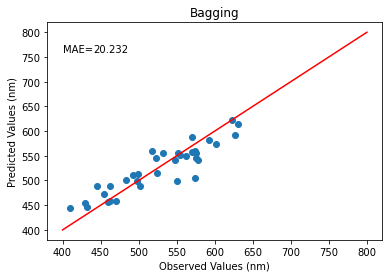

In [31]:
B_regr = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=19),
                                      n_estimators=6,
                                      random_state=55)
            
B_regr.fit(X_train, np.ravel(Y_train))
            
B_Y_pred = B_regr.predict(X_test)
            
mae = mean_absolute_error(Y_test, B_Y_pred)
print("Mean absolute error =", round(mae,3))

plt.figure()
plt.title("Bagging")
plt.plot(Y_test, B_Y_pred, 'o')
plt.xlabel('Observed Values (nm)')
plt.ylabel('Predicted Values (nm)')
plt.plot([400,800],[400,800], color = 'r')
plt.text(400, 760, 'MAE=' , fontdict=None)
plt.text(440, 760, round(mae,3) , fontdict=None)
plt.show()

### 2. Decision Trees

In [32]:
# This is a grid search for three parameters in the Decision Trees algorithm. 
# Parameters are: max_depth, max_features, random_state.
# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(1, 21)):
    for j in range(1, 21):
        for k in range(5, 80, 5):
            
            DT_regr = DecisionTreeRegressor(max_depth=i,
                                max_features=j,
                                random_state=k)
            
            DT_regr.fit(X_train, Y_train)

            DT_Y_pred = DT_regr.predict(X_test)

            mae = mean_absolute_error(Y_test, DT_Y_pred)
            
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 20/20 [00:36<00:00,  1.81s/it]

21.835714285714285 19 18 20


Mean absolute error = 21.836


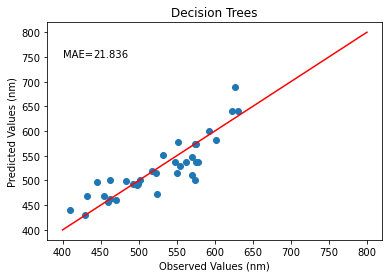

In [33]:
DT_regr = DecisionTreeRegressor(max_depth=19,
                                max_features=18,
                                random_state=20)
            
DT_regr.fit(X_train, np.ravel(Y_train))
            
DT_Y_pred = DT_regr.predict(X_test)
            
DT_mae = mean_absolute_error(Y_test, DT_Y_pred)
print("Mean absolute error =", round(DT_mae,3))

plt.figure()
plt.title("Decision Trees")
plt.plot(Y_test, DT_Y_pred, 'o')
plt.xlabel('Observed Values (nm)')
plt.ylabel('Predicted Values (nm)')
plt.plot([400,800],[400,800], color = 'r')
plt.text(400, 750, 'MAE=' , fontdict=None)
plt.text(440, 750, round(DT_mae,3) , fontdict=None)
plt.show()

### 3. Random Forrests

In [34]:

# This is a grid search for three parameters in the Random Forest algorithm. 
# Parameters are: max_depth, n_estimators, max_features.
# Random_state is set to 45.
# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 21)):
    for j in range(1, 21):
        for k in range(2, 50, 2):
            RF_regr = RandomForestRegressor(max_depth=i, 
                                            n_estimators=j, 
                                            max_features=k,
                                            random_state=45
                                                )
            RF_regr.fit(X_train, np.ravel(Y_train))
            RF_Y_pred = RF_regr.predict(X_test)

            mae = mean_absolute_error(Y_test, RF_Y_pred)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 20/20 [02:50<00:00,  8.54s/it]

21.964285714285715 20 2 42


### 4. Extra Trees

In [35]:
# This is a grid search for three parameters in the Random Forest algorithm. 
# Parameters are: max_depth, n_estimators, max_features.
# Random_state is set to 45.
# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 21)):
    for j in range(1, 21):
        for k in range(2, 50, 2):
            ET_regr = ExtraTreesRegressor(n_estimators=i, 
                                            max_features=j,
                                            random_state=k
                                                )
            ET_regr.fit(X_train, np.ravel(Y_train))
            ET_Y_pred = ET_regr.predict(X_test)

            mae = mean_absolute_error(Y_test, ET_Y_pred)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 20/20 [02:30<00:00,  7.51s/it]

17.600000000000005 6 19 42


Mean absolute error = 17.6


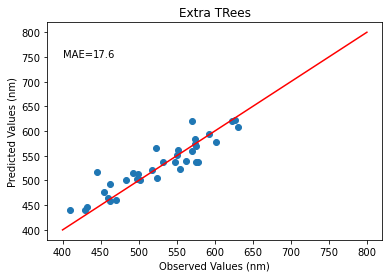

In [37]:
ET_regr = ExtraTreesRegressor(n_estimators=6, max_features=19, random_state=42)
            
ET_regr.fit(X_train, np.ravel(Y_train))
            
ET_Y_pred = ET_regr.predict(X_test)
            
ET_mae = mean_absolute_error(Y_test, ET_Y_pred)
print("Mean absolute error =", round(ET_mae,3))

plt.figure()
plt.title("Extra TRees")
plt.plot(Y_test, ET_Y_pred, 'o')
plt.xlabel('Observed Values (nm)')
plt.ylabel('Predicted Values (nm)')
plt.plot([400,800],[400,800], color = 'r')
plt.text(400, 750, 'MAE=' , fontdict=None)
plt.text(440, 750, round(ET_mae,3) , fontdict=None)
plt.show()

### 5. Gradient Boosting

In [38]:
min_mae = 99999
min_i, min_j = 0, 0
for i in tqdm(range(80, 350, 10)):
    for j in range(1, 100):
        GB_regr = GradientBoostingRegressor(n_estimators=i, max_depth=j)
        GB_regr.fit(X_train, np.ravel(Y_train))
        GB_Y_pred = GB_regr.predict(X_test)

        mae = mean_absolute_error(Y_test, GB_Y_pred)
        if (min_mae > mae):
            min_mae = mae
            min_i = i
            min_j = j
                        
print(min_mae, min_i, min_j)

100%|██████████| 27/27 [15:03<00:00, 33.45s/it]

17.752698692920823 320 5


### 6. Other models

In [39]:
REGRESSIONS = {
    "K-nn": KNeighborsRegressor(),                          
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(random_state=0),
                }
# mean absolute error is used to evaluate the performance of all regressions.


for name, reg in REGRESSIONS.items():     
    reg.fit(X_train, Y_train)                 
    Y_pred = pd.DataFrame(reg.predict(X_test))
    
    print(name)
    
    mae = mean_absolute_error(Y_test, Y_pred)
    
    print(' MAE for diameter is ', mae, '\n')

K-nn
 MAE for diameter is  37.405714285714296 

Linear regression
 MAE for diameter is  19717973345319.973 

Ridge
 MAE for diameter is  38.25023500781633 

Lasso
 MAE for diameter is  37.01288860287354 

ElasticNet
 MAE for diameter is  46.14045232121062 



## Conclusion
**Extra Trees** gave the least error for the prediction of diameter.

### Saving model

In [6]:
ET_regr = ExtraTreesRegressor(n_estimators=6, max_features=19, random_state=42)
            
ET_regr.fit(X_train, np.ravel(Y_train))
            
ET_Y_pred = ET_regr.predict(X_test)

joblib.dump(ET_regr, "./extra_trees_abs.joblib")

['./extra_trees_abs.joblib']